In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

Read in data (c/o Andy Casey)

In [2]:
a = open('../data/open_clusters4_tags_dr13_30eB_nofilt_5026_norm8.pickle', 'r' ) # can do with aspcap 
b = pickle.load(a)
a.close()
dataout = b[0]
dataout_labels = ["teff", "logg", "[Fe/H]", "C", "N", "O", "Na", "Mg", "Al", "Si", "S", "K", "Ca", "Ti", "V", "Mn", "Ni", "P", "Cr", "Co", "Cu", "Rb", "FWHM"]
a = open('../data/open_clusters_name4.txt', 'r')
al = a.readlines()
names = []
for each in al:
    names.append(each.strip()) 
names = np.asarray(names)

In [3]:
inds = np.where(names == 'N6791')[0] # select NGC 6791 members only
params = dataout[inds,0:3]
abunds = dataout[inds,3:-1]
twomass_ids = np.asarray(b[-1])[inds]

In [14]:
errs = [b[1][i,i] for i in range(23)] 
print errs

[array([ 1.18083982e-04,  5.88987674e-05,  7.82602758e-05, -3.94162099e-05,
        1.56058204e-04,  3.89543048e-06,  9.49721236e-05, -5.65407613e-05,
        1.59278180e-05, -1.53384390e-05, -6.44921796e-05, -3.21917344e-05,
       -1.95193404e-05, -4.18602627e-05, -1.82355805e-04, -2.66763154e-07,
       -1.03953632e-04, -1.71640521e-05,  1.27834921e-04,  1.01241062e-05,
       -2.55181486e-05,  3.63017962e-05, -3.92443651e-19]), array([ 1.59354033e-05,  6.34898366e-05,  1.25559417e-05,  1.12311000e-04,
       -7.64264996e-05, -1.64646719e-05,  5.16823350e-05,  8.93986381e-07,
       -2.38368141e-05, -4.08102278e-05,  8.28624212e-06, -2.59953410e-05,
       -4.05029157e-05,  7.42334728e-05,  4.85622766e-05,  9.17423454e-06,
       -3.54796163e-06, -6.53753715e-05,  8.47265655e-06,  3.29256147e-05,
        7.37212907e-06, -7.40456769e-05, -2.09197780e-19]), array([ 1.35810806e-05,  1.08918668e-05,  2.40588245e-05,  2.00440633e-05,
       -3.33028996e-05,  7.51371386e-06, -2.29393787e-

calculate condensation temperature fits (ignoring CNO because those are complicated!)

In [43]:
import warnings; warnings.simplefilter('ignore')
import q2
Tc = np.asarray([q2.abundances.gettc(x+'I') for x in dataout_labels[3:-1]])

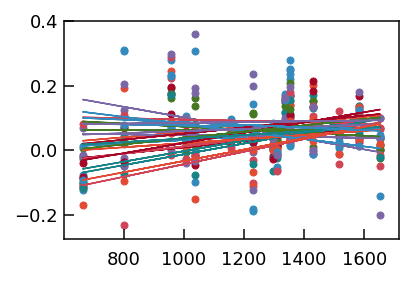

In [44]:
slopes = []
intercepts = []
for i in range(len(twomass_ids)):
    xs = Tc[3:]
    ys = abunds[i,3:]
    A = np.vander(xs, 2)
    m = np.ones(len(xs), dtype=bool) # mask
    w = np.linalg.solve(np.dot(A[m].T, A[m]), np.dot(A[m].T, ys[m]))
    plt.scatter(xs, ys)
    mu = np.dot(A, w)
    slopes.append(w[0])
    intercepts.append(w[1])
    plt.plot(xs, mu)

Text(0.5,0,'T$_c$ slope ($\\times 10^4$ dex K$^{-1}$)')

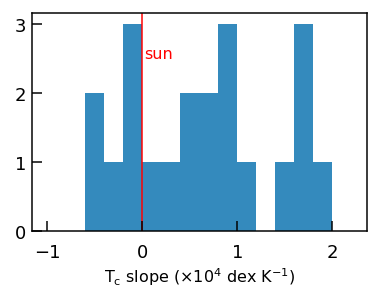

In [45]:
plt.hist(np.asarray(slopes) * 1.e4, bins=np.arange(-1.0, 2.4, 0.2))
plt.axvline(0.0, c='r')
plt.text(0.02, 2.5, 'sun', color='r', fontsize=16)
plt.xlabel(r'T$_c$ slope ($\times 10^4$ dex K$^{-1}$)', fontsize=16)

In [12]:
len(slopes)

NameError: name 'slopes' is not defined